<a href="https://colab.research.google.com/github/AsminiKOD/ClientPredicting/blob/Preprocessing/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Format CSV

In [1]:
import pandas as pd
from google.colab import files

In [3]:
# Read the original CSV file with ";" as the delimiter
data = pd.read_csv('bank-additional-full.csv', sep=';', engine='python')

# Overwrite the original CSV file with properly separated columns
data.to_csv('bank.csv', index=False)

# Display the first few rows to confirm the changes
print(data.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [7]:
# Download the updated file
files.download('bank.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Anlyse the Dataset

In [ ]:
import pandas as pd

In [5]:
def explain_columns(csv_file):
    df = pd.read_csv(csv_file)
    explanation = {}

    for col in df.columns:
        col_type = df[col].dtype
        explanation[col] = {"Data Type": col_type}

        if pd.api.types.is_numeric_dtype(df[col]):
            # If the column is numerical
            explanation[col]["Statistical Summary"] = df[col].describe().to_dict()
        else:
            # If the column is categorical
            explanation[col]["Unique Values"] = df[col].unique().tolist()

    return explanation

csv_file = 'bank.csv'
column_explanations = explain_columns(csv_file)

for col, info in column_explanations.items():
    print(f"Column: {col}")
    print(f"  Data Type: {info['Data Type']}")

    if "Statistical Summary" in info:
        print(f"  Statistical Summary: {info['Statistical Summary']}")
    if "Unique Values" in info:
        print(f"  Unique Values: {info['Unique Values']}")

    print()


Column: age
  Data Type: int64
  Statistical Summary: {'count': 41188.0, 'mean': 40.02406040594348, 'std': 10.421249980934235, 'min': 17.0, '25%': 32.0, '50%': 38.0, '75%': 47.0, 'max': 98.0}

Column: job
  Data Type: object
  Unique Values: ['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']

Column: marital
  Data Type: object
  Unique Values: ['married', 'single', 'divorced', 'unknown']

Column: education
  Data Type: object
  Unique Values: ['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']

Column: default
  Data Type: object
  Unique Values: ['no', 'unknown', 'yes']

Column: housing
  Data Type: object
  Unique Values: ['no', 'yes', 'unknown']

Column: loan
  Data Type: object
  Unique Values: ['no', 'yes', 'unknown']

Column: contact
  Data Type: object
  Unique Values: ['telephone', 'cellular']

Column: 

###Data Visualization

####Numerical

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

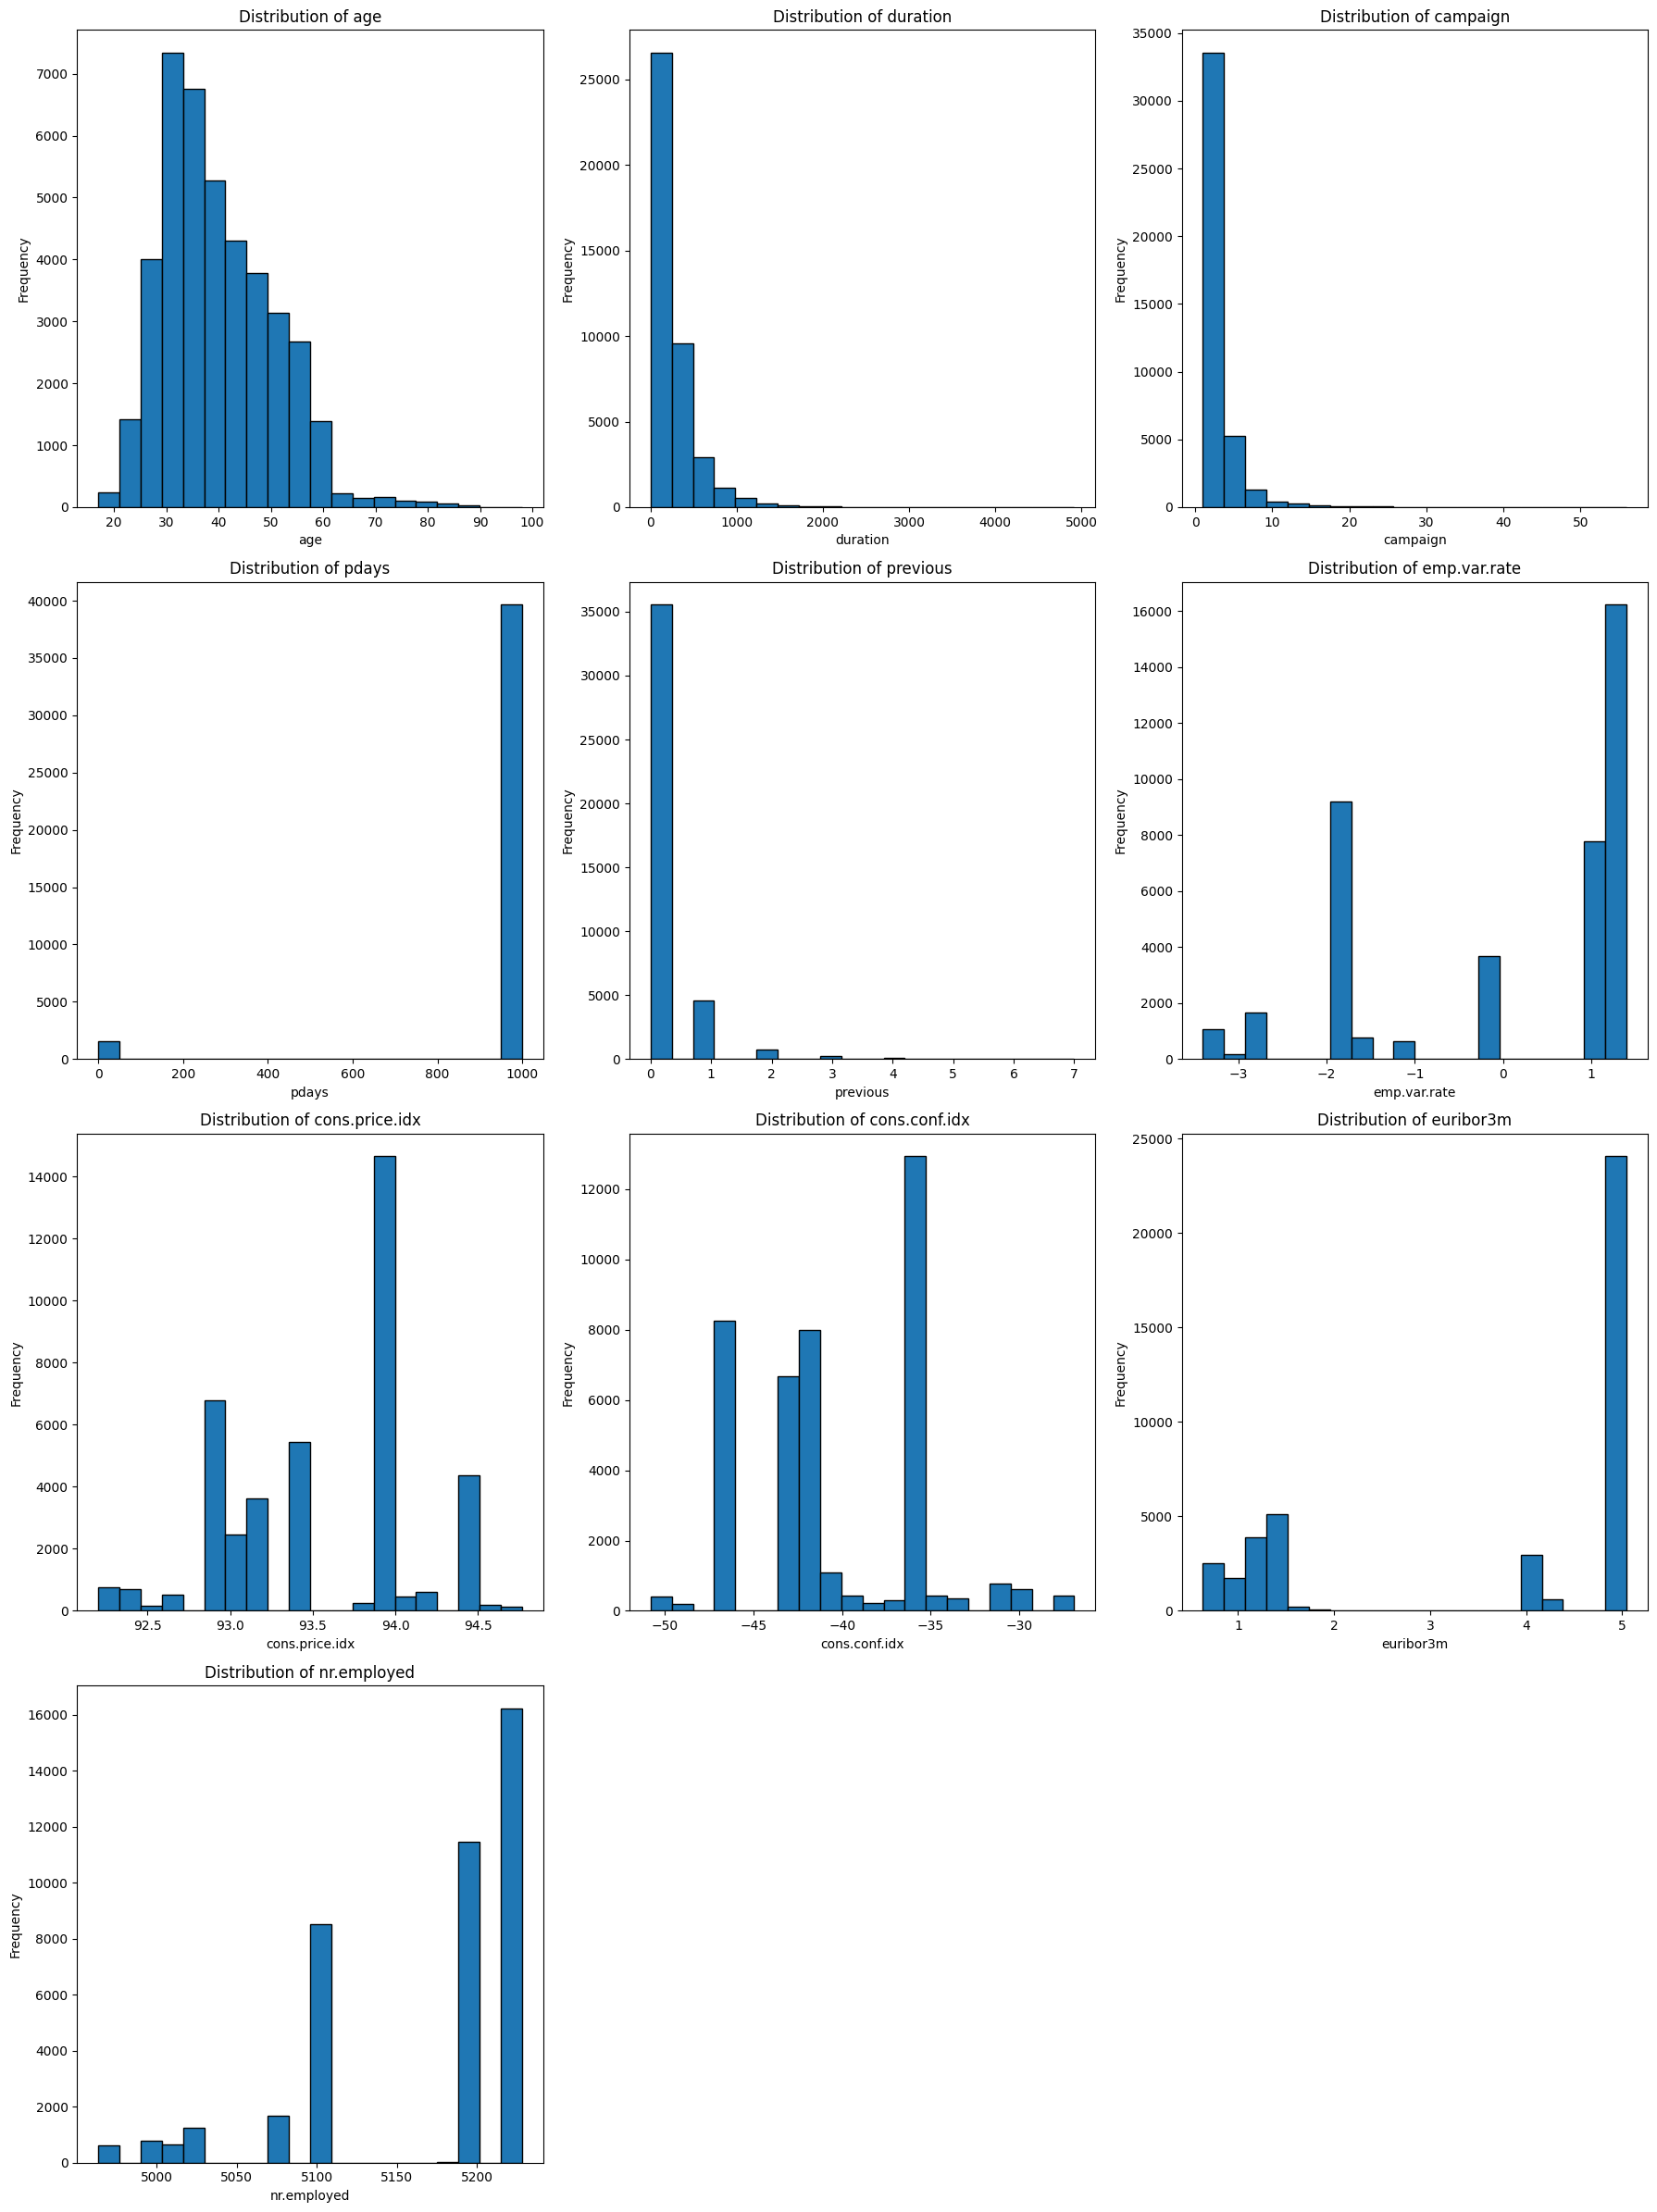

In [25]:
def visualize_numerical_distribution(csv_file):
    df = pd.read_csv(csv_file)
    numerical_cols = df.select_dtypes(include=['number']).columns

    if len(numerical_cols) == 0:
        print("No numerical columns found.")
        return

    # Set the maximum number of plots per row
    max_plots_per_row = 3
    num_rows = int(np.ceil(len(numerical_cols) / max_plots_per_row))

    fig, axes = plt.subplots(num_rows, max_plots_per_row, figsize=(6 * max_plots_per_row, 6 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        axes[i].hist(df[col], bins=20, edgecolor='black')
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Turn off axes for unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

csv_file = 'bank.csv'
visualize_numerical_distribution(csv_file)


####Categorical

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

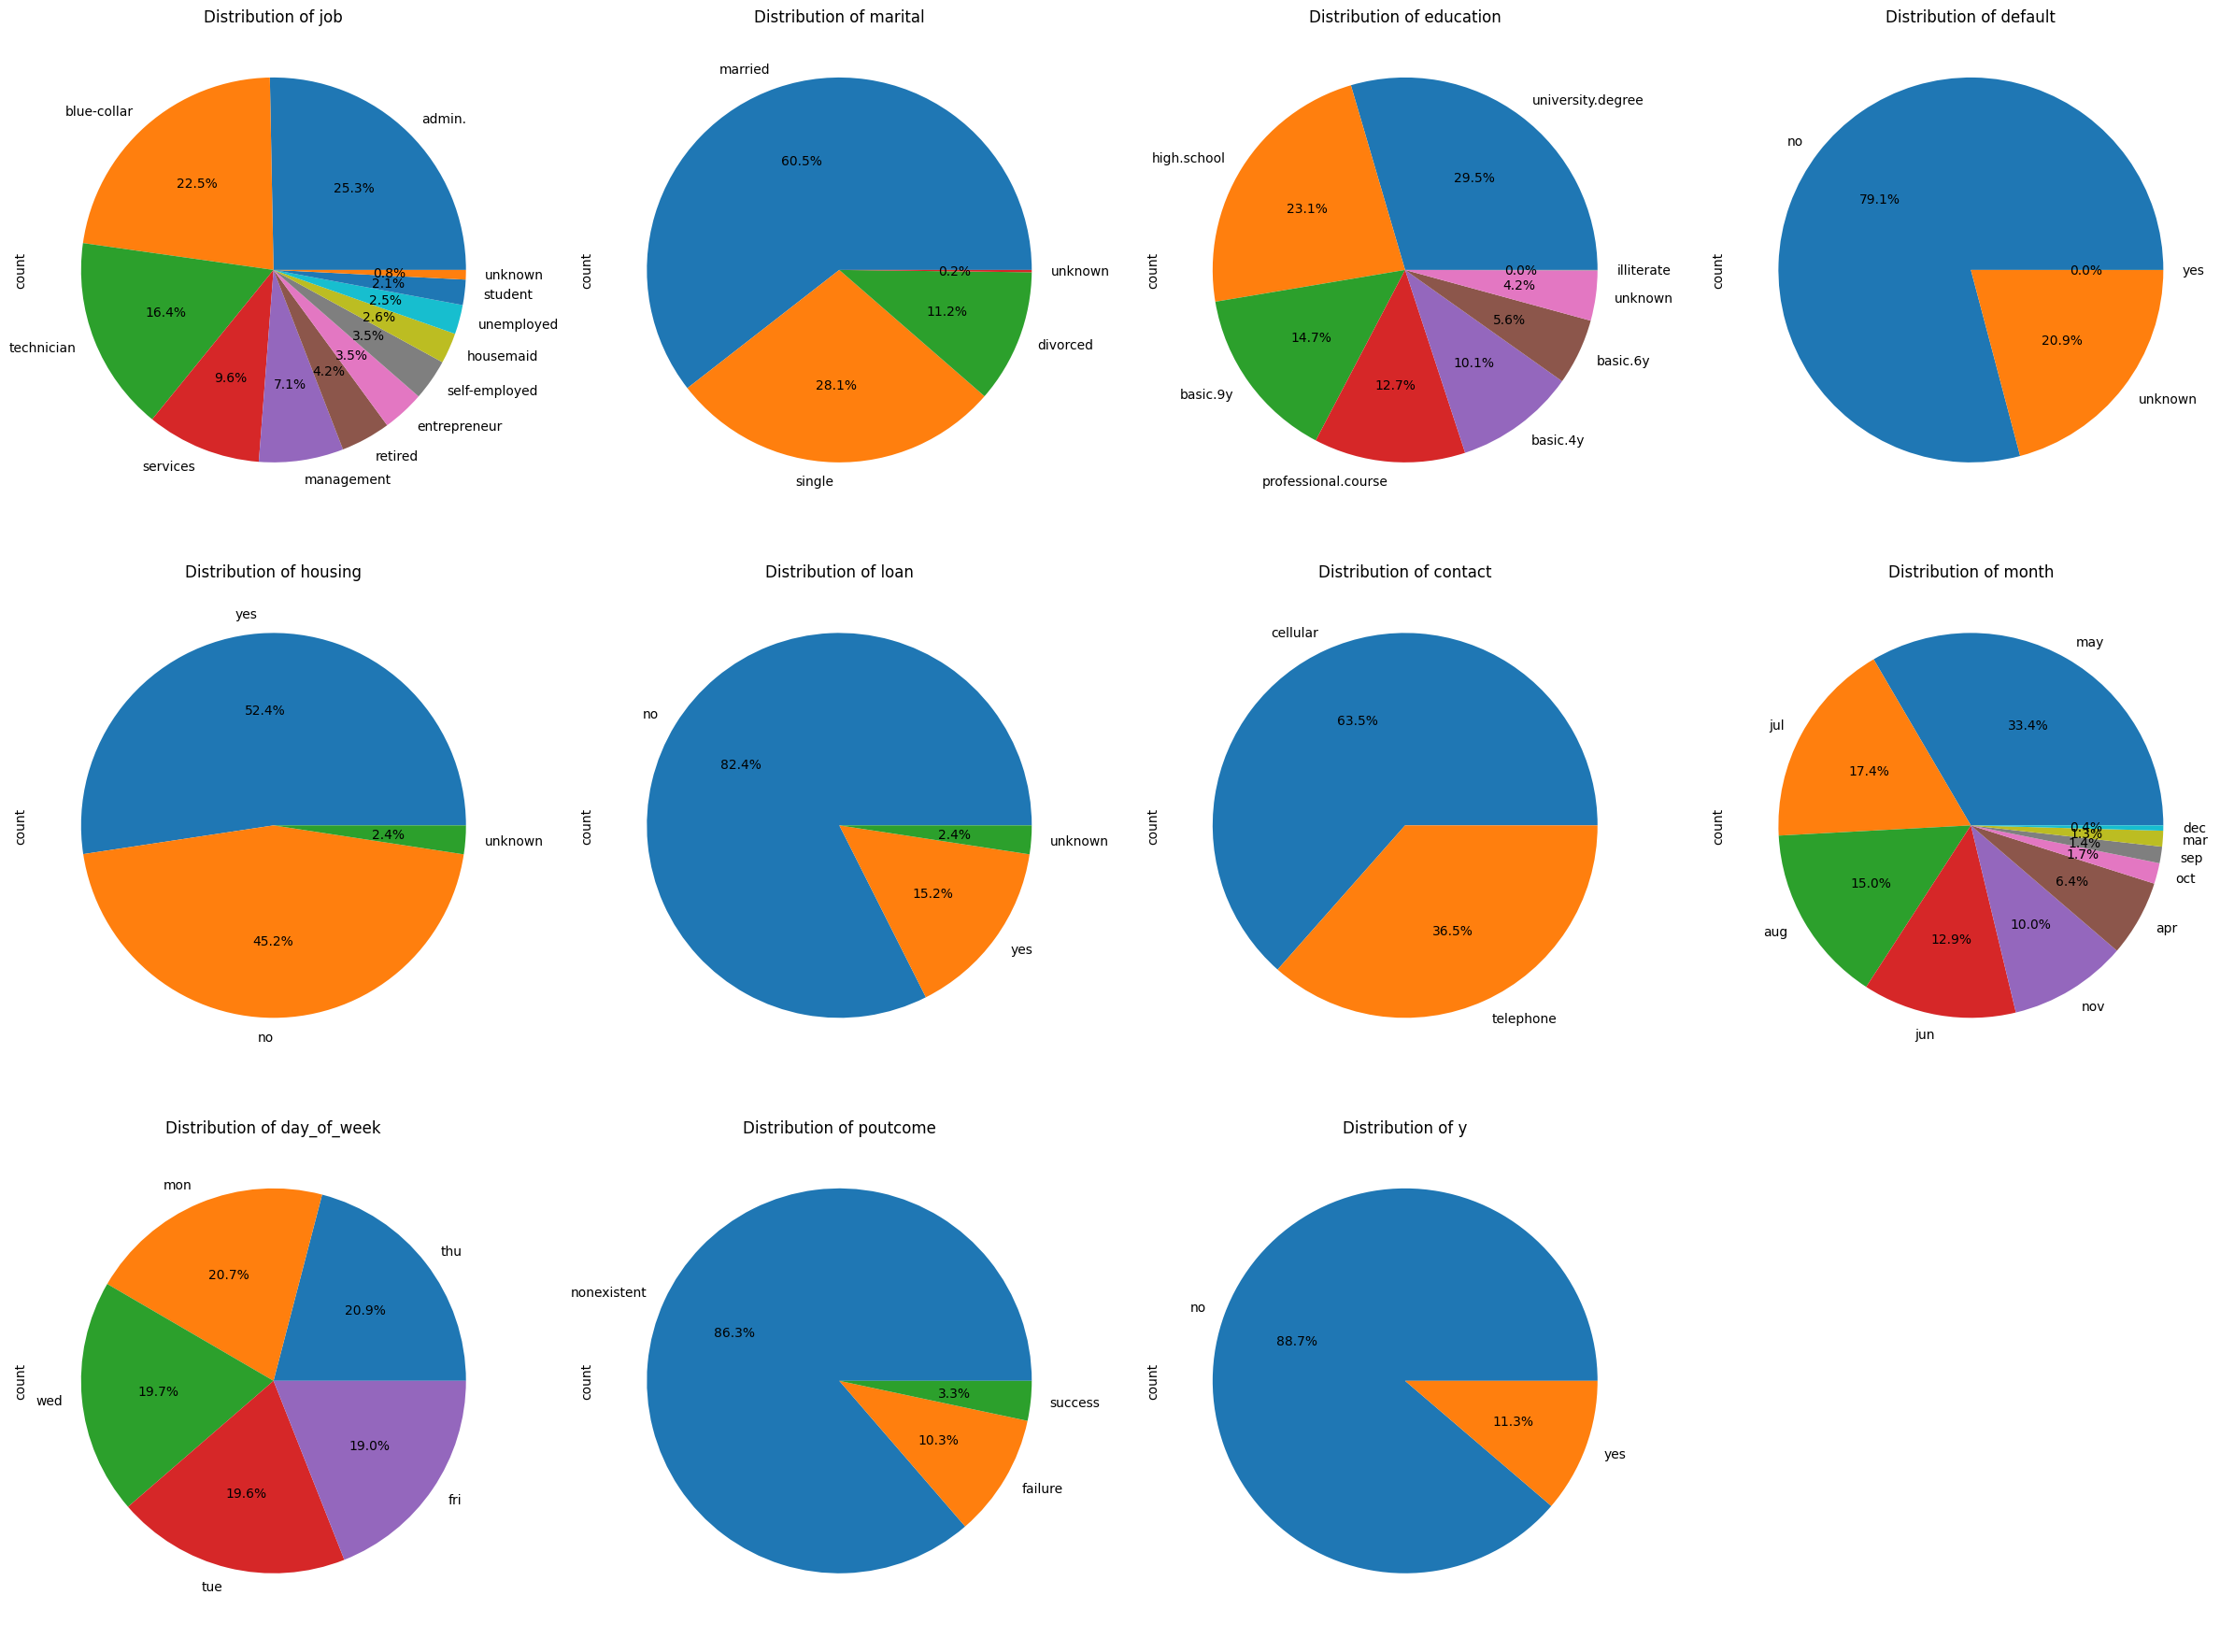

In [27]:
def visualize_categorical_distribution(csv_file):
    df = pd.read_csv(csv_file)
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    if len(categorical_cols) == 0:
        print("No categorical columns found.")
        return

    # Set the maximum number of plots per row
    max_plots_per_row = 4
    num_rows = int(np.ceil(len(categorical_cols) / max_plots_per_row))

    fig, axes = plt.subplots(num_rows, max_plots_per_row, figsize=(6 * max_plots_per_row, 6 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i], legend=False)
        axes[i].set_title(f"Distribution of {col}")

    # Turn off axes for unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

csv_file = 'bank.csv'
visualize_categorical_distribution(csv_file)


####Data Distrubution with Y

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

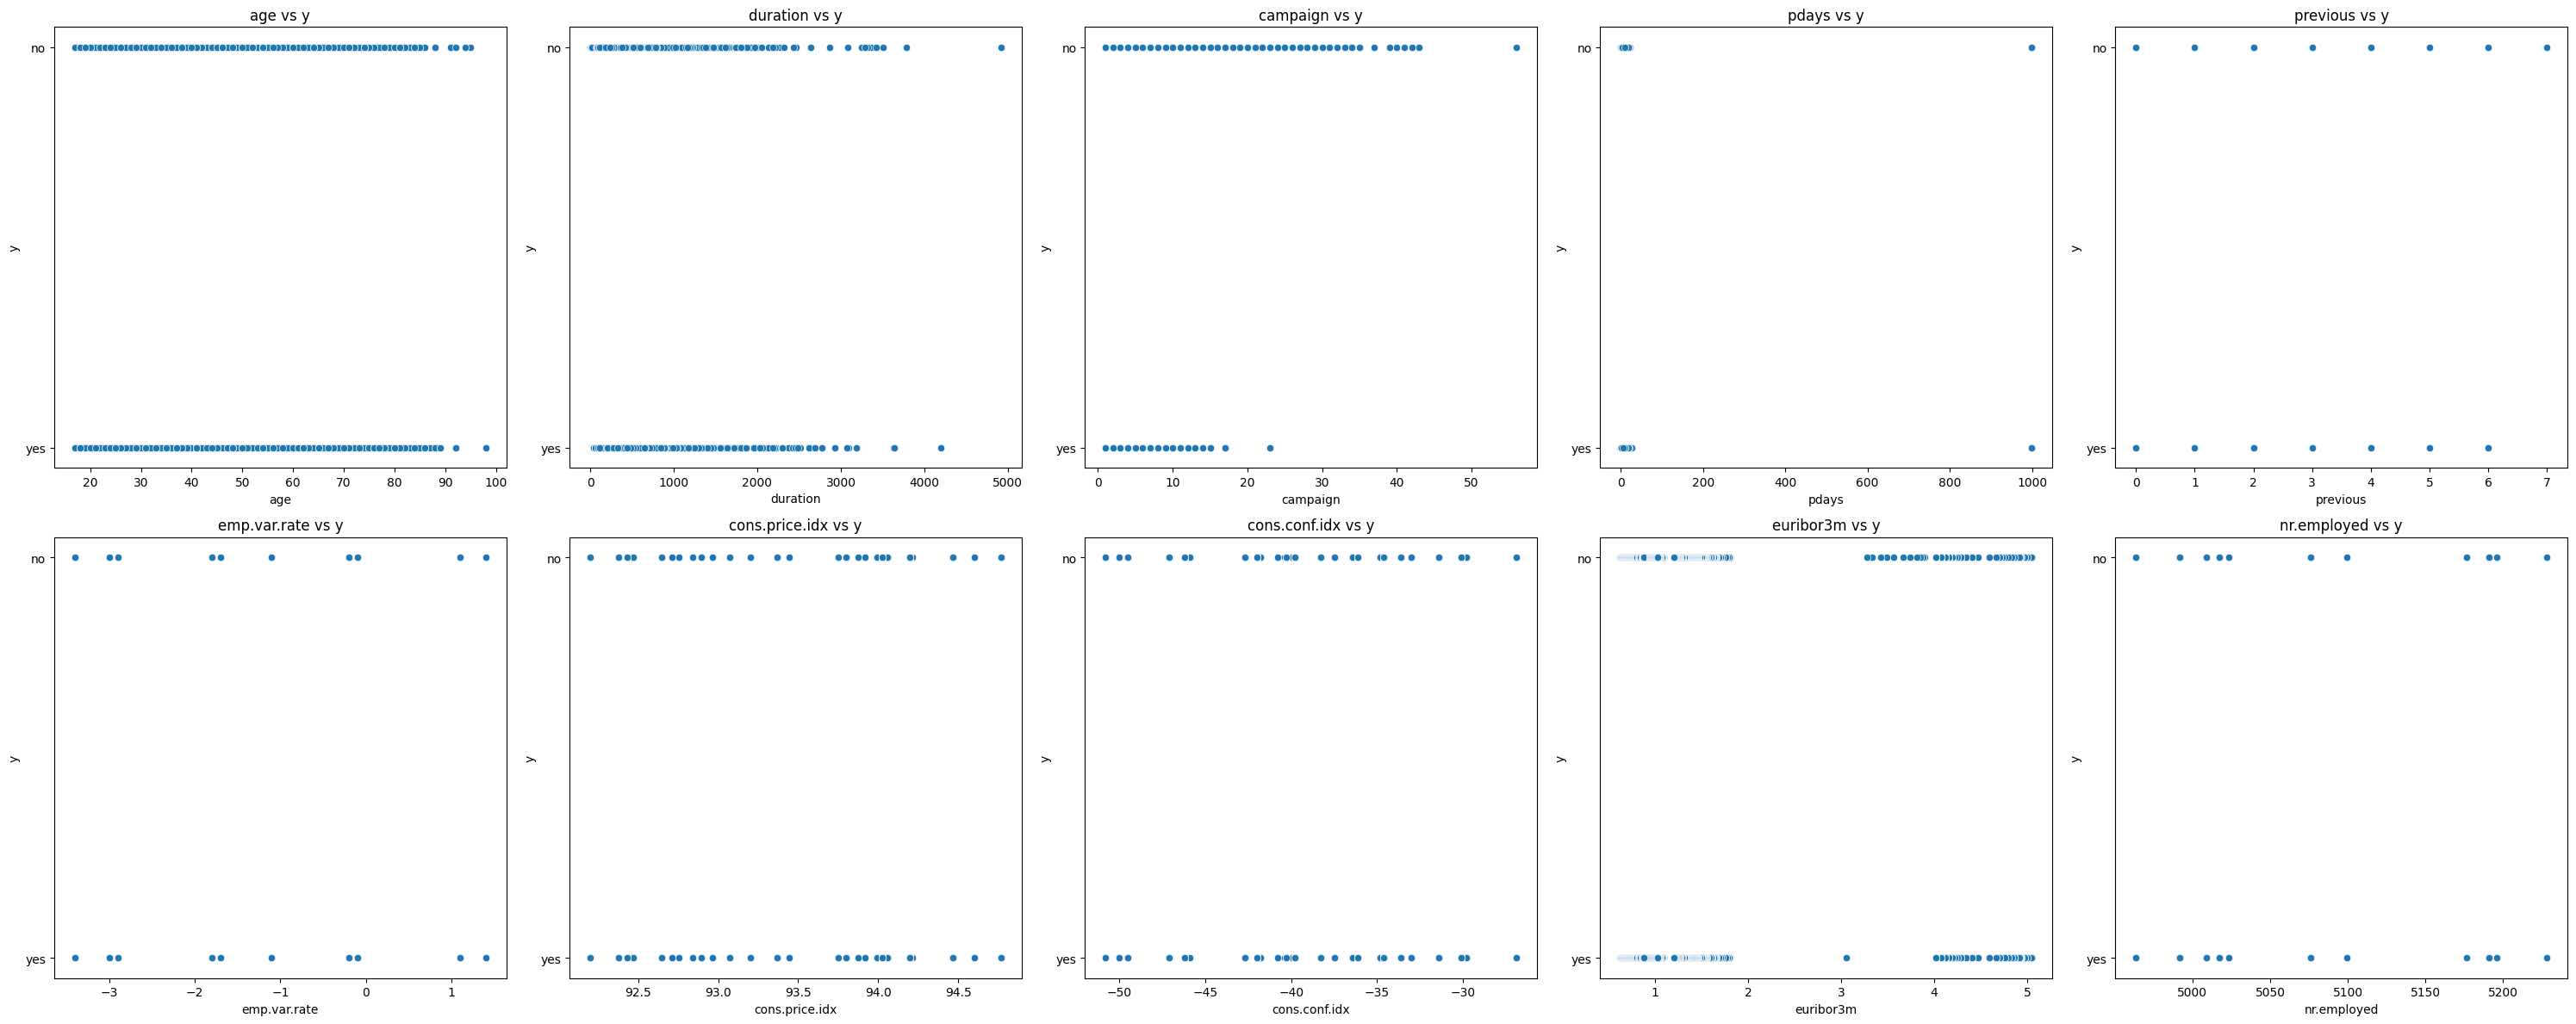

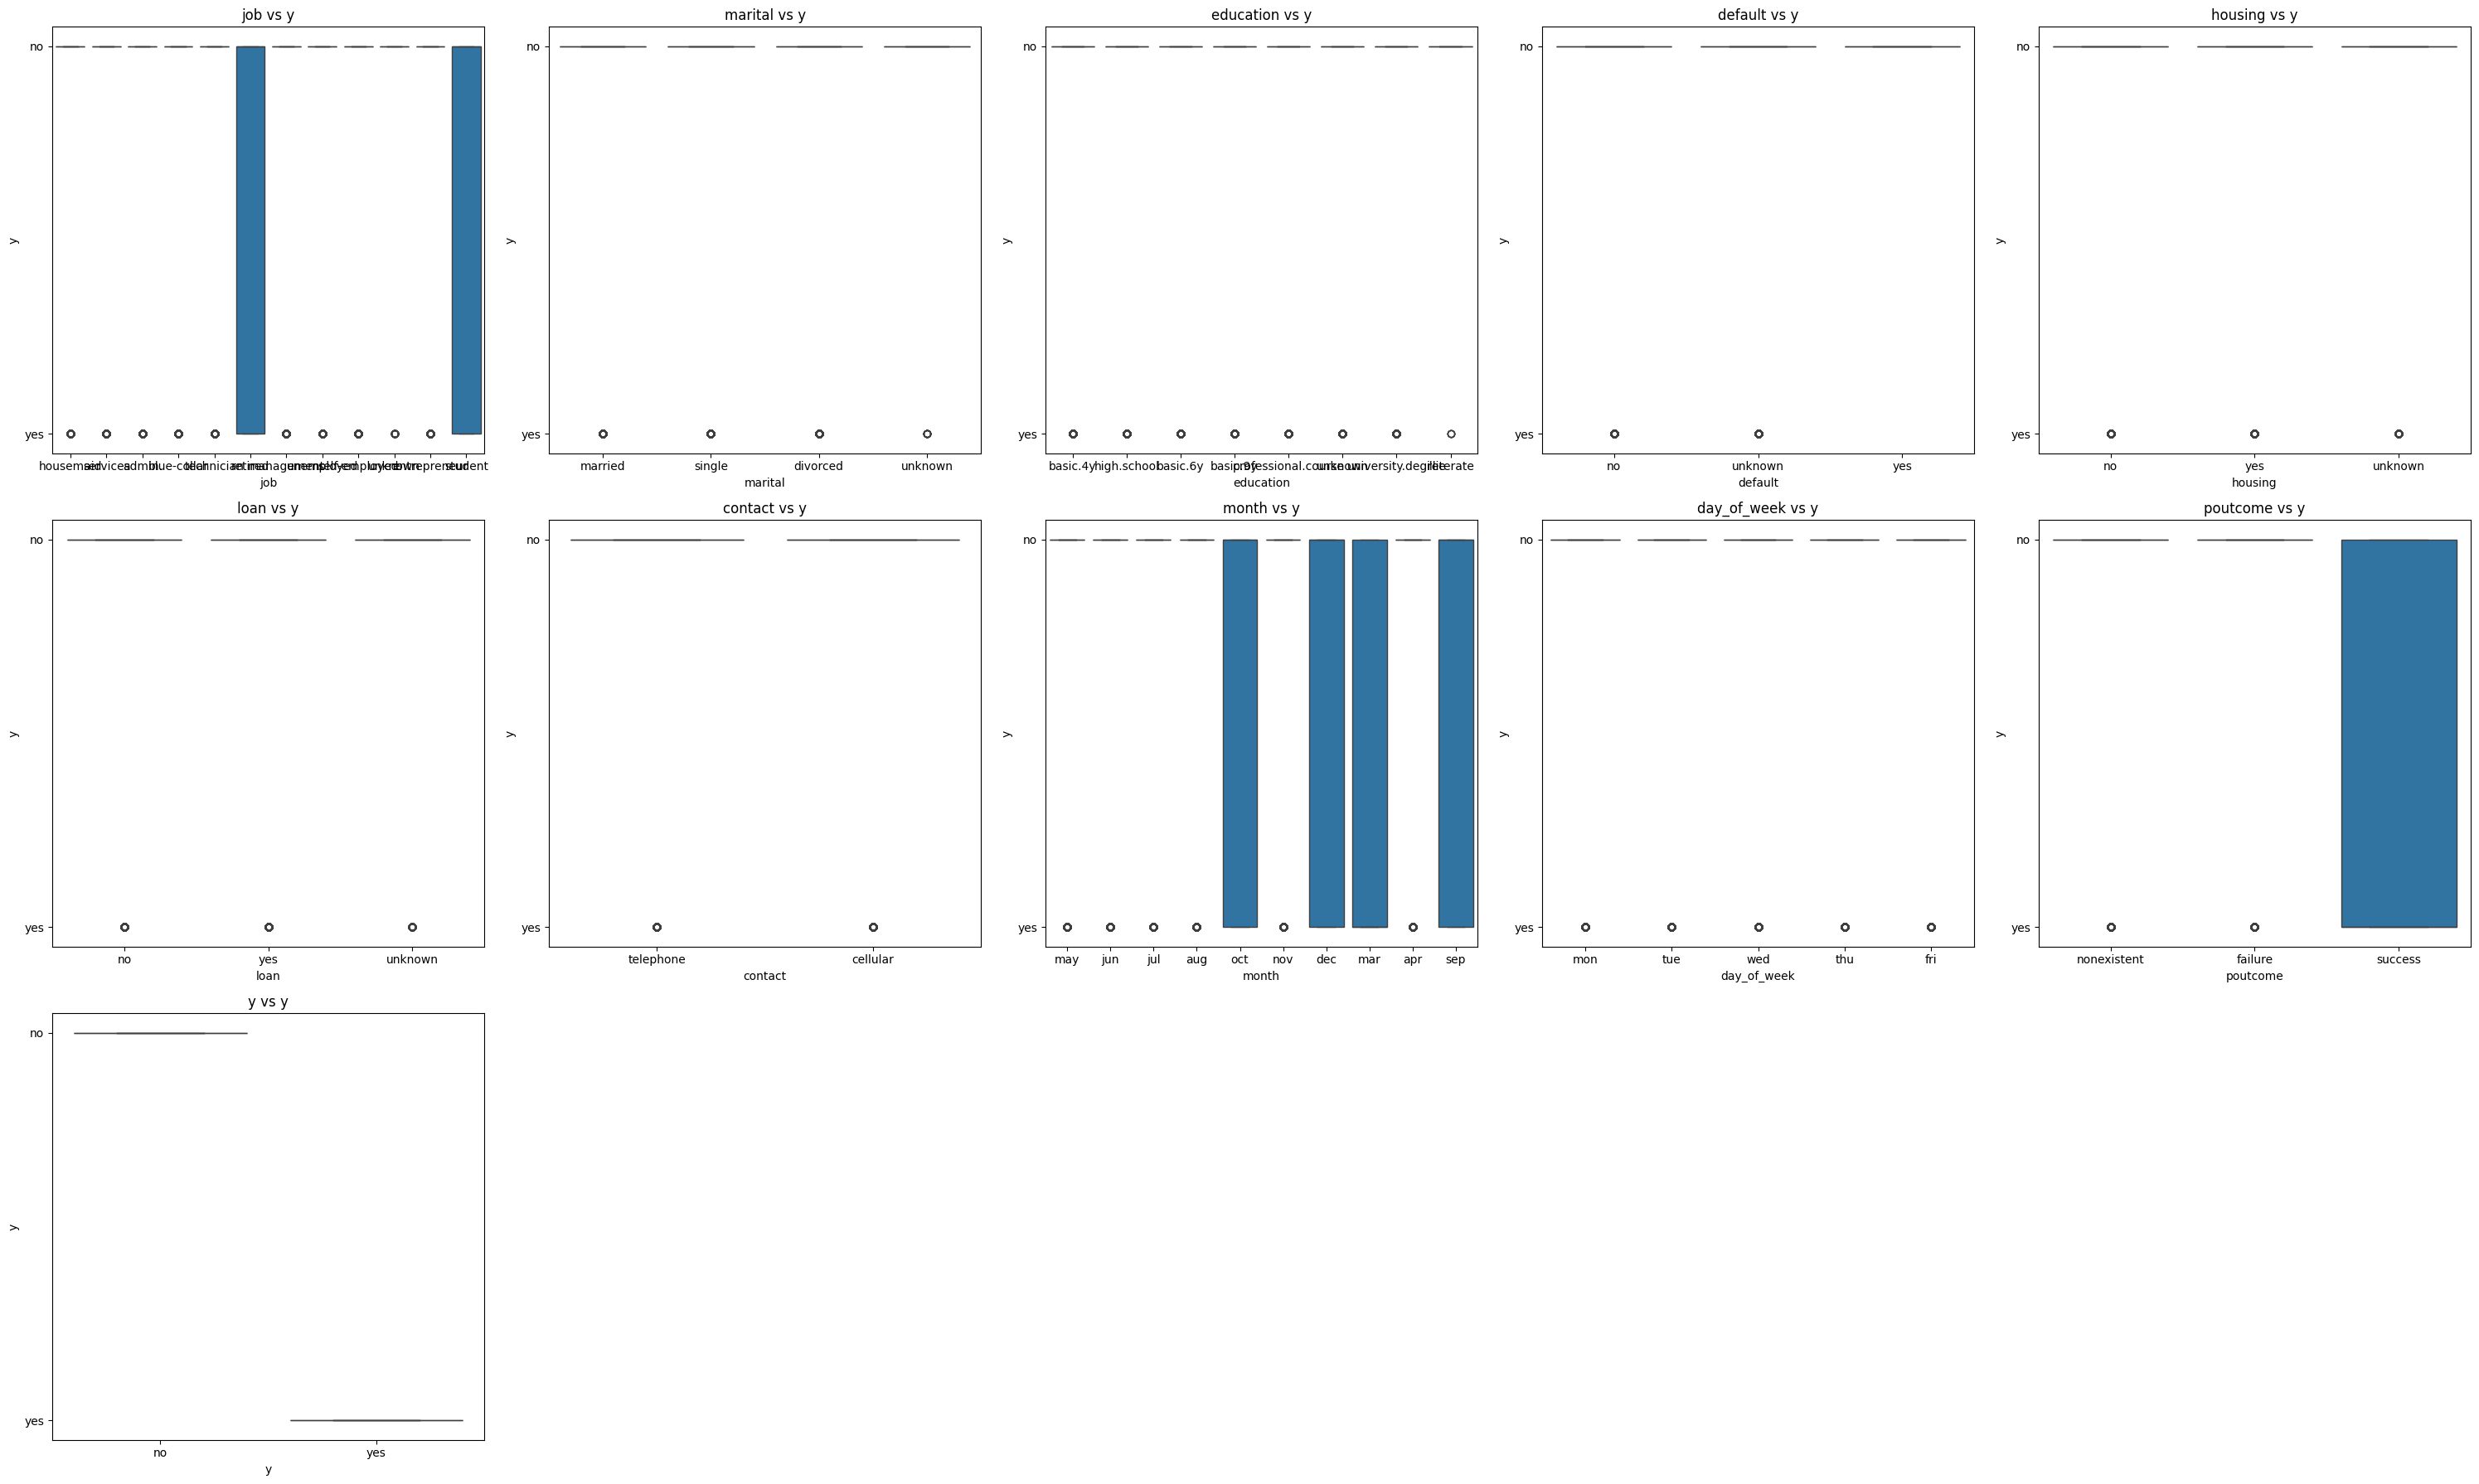

In [56]:
def visualize_column_with_target(csv_file, target_column):
    df = pd.read_csv(csv_file)

    # Separate numerical and categorical columns
    numerical_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    # Set the maximum number of plots per row
    max_plots_per_row = 5

    # Plot Numerical Columns vs y
    if len(numerical_cols) > 0:
        num_rows = int(np.ceil(len(numerical_cols) / max_plots_per_row))
        fig, axes = plt.subplots(num_rows, max_plots_per_row, figsize=(6 * max_plots_per_row, 6 * num_rows))
        axes = axes.flatten()

        for i, col in enumerate(numerical_cols):
            sns.scatterplot(data=df, x=col, y=target_column, ax=axes[i])
            axes[i].set_title(f"{col} vs {target_column}")
            axes[i].set_xlabel(col)
            axes[i].set_ylabel(target_column)

        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()

    # Plot Categorical Columns vs y
    if len(categorical_cols) > 0:
        num_rows = int(np.ceil(len(categorical_cols) / max_plots_per_row))
        fig, axes = plt.subplots(num_rows, max_plots_per_row, figsize=(6 * max_plots_per_row, 6 * num_rows))
        axes = axes.flatten()

        for i, col in enumerate(categorical_cols):
            sns.boxplot(data=df, x=col, y=target_column, ax=axes[i])
            axes[i].set_title(f"{col} vs {target_column}")
            axes[i].set_xlabel(col)
            axes[i].set_ylabel(target_column)

        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()

csv_file = 'bank.csv'
target_column = 'y'
visualize_column_with_target(csv_file, target_column)


###Handle Missing Value

In [31]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values for numeric columns with the median
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Fill missing values for non-numeric columns with the mode (most frequent value)
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
for col in non_numeric_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Save the dataset with handled missing values to another CSV file
missing_values_handled_file_path = 'missing-values-handled.csv'
data.to_csv(missing_values_handled_file_path, index=False)

# Display the first few rows of the dataset
print(data.head())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


<ipython-input-31-9a983167e5d8>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [56]:
# Download the updated file
files.download('missing-values-handled.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Handle Duplicate

In [32]:
# Check for duplicate rows
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Drop duplicate rows
data = data.drop_duplicates()

# Save the dataset after removing duplicates to another CSV file
duplicates_handled_file_path = 'duplicates-handled.csv'
data.to_csv(duplicates_handled_file_path, index=False)

# Display the first few rows of the dataset after handling duplicates
print(data.head())


Number of duplicate rows: 12
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.con

In [57]:
# Download the updated file
files.download('duplicates-handled.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Check Intercorrelation

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

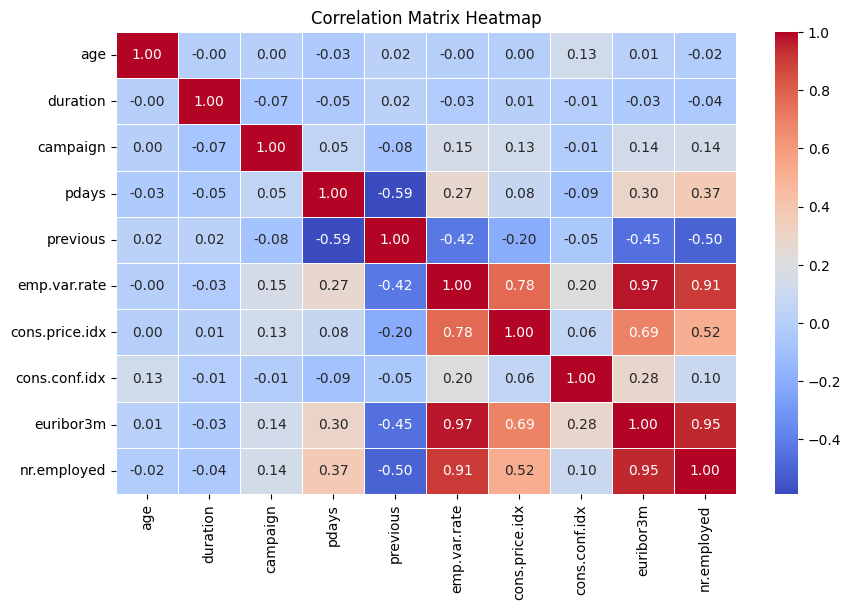

In [62]:
data = pd.read_csv('duplicates-handled.csv')

# Select only numerical columns
numerical_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix for numerical columns
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

###Feature Importance

In [63]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

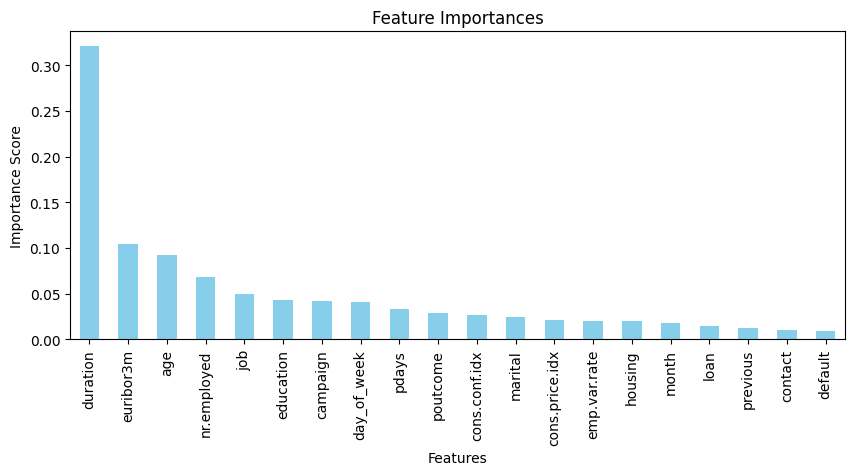

In [64]:
# Load the dataset
data = pd.read_csv('duplicates-handled.csv')

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable as integers
y = label_encoder.fit_transform(data['y'])

# Encode all categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if col != 'y':  # Skip the target variable
        data[col] = label_encoder.fit_transform(data[col])

# Split features and target variable
X = data.drop('y', axis=1)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Extract feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sort features by importance
sorted_features = feature_importances.sort_values(ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 4))
sorted_features.plot(kind='bar', color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


###Feature Selection

In [69]:
# Drop the specified columns
data = pd.read_csv('duplicates-handled.csv')
data_cleaned = data.drop(['duration', 'contact', 'default','emp.var.rate','cons.price.idx'], axis=1)

# Save the cleaned dataset to a new CSV file
data_cleaned.to_csv('Feature_selection.csv', index=False)

# Verify the new dataset by displaying the first few rows
print(data_cleaned.head())

   age        job  marital    education housing loan month day_of_week  \
0   56  housemaid  married     basic.4y      no   no   may         mon   
1   57   services  married  high.school      no   no   may         mon   
2   37   services  married  high.school     yes   no   may         mon   
3   40     admin.  married     basic.6y      no   no   may         mon   
4   56   services  married  high.school      no  yes   may         mon   

   campaign  pdays  previous     poutcome  cons.conf.idx  euribor3m  \
0         1    999         0  nonexistent          -36.4      4.857   
1         1    999         0  nonexistent          -36.4      4.857   
2         1    999         0  nonexistent          -36.4      4.857   
3         1    999         0  nonexistent          -36.4      4.857   
4         1    999         0  nonexistent          -36.4      4.857   

   nr.employed   y  
0       5191.0  no  
1       5191.0  no  
2       5191.0  no  
3       5191.0  no  
4       5191.0  no  


In [70]:
# Download the updated file
files.download('Feature_selection.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [71]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

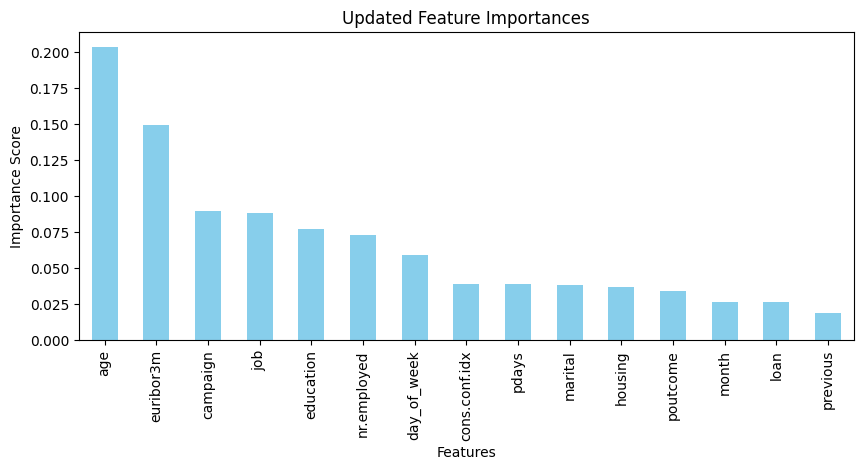

In [72]:
# Load the cleaned dataset
data_cleaned = pd.read_csv('Feature_selection.csv')

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable as integers
y = label_encoder.fit_transform(data_cleaned['y'])

# Encode all categorical features
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if col != 'y':
        data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col])

# Split features and target variable
X_cleaned = data_cleaned.drop('y', axis=1)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_cleaned, y)

# Extract feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_cleaned.columns)

# Sort features by importance
sorted_features = feature_importances.sort_values(ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 4))
sorted_features.plot(kind='bar', color='skyblue')
plt.title('Updated Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


###Outlier detection

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

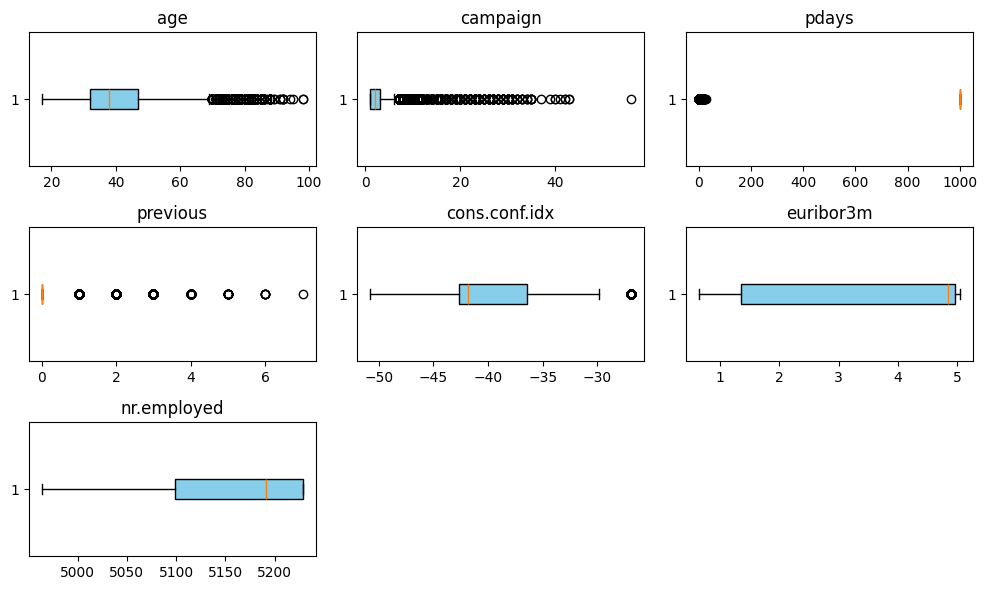

In [74]:
# Load the dataset
data = pd.read_csv('Feature_selection.csv')

# Identify numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot box plots for each numerical column
plt.figure(figsize=(10, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)  # Arrange plots in rows of 3
    plt.boxplot(data[column], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(column)

plt.tight_layout()
plt.show()


###Outlier Handling

In [75]:
import pandas as pd


In [76]:
# Load the dataset
data = pd.read_csv('Feature_selection.csv')

# Capping outliers for 'age', 'campaign', and 'cons.conf.idx'
columns_to_cap = ['age', 'campaign', 'cons.conf.idx']

for column in columns_to_cap:
    # Calculate the 1st quartile (Q1) and 3rd quartile (Q3)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Define lower and upper limits for capping
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Apply capping
    data[column] = data[column].clip(lower=lower_limit, upper=upper_limit)

# Save the capped dataset to a new file
data.to_csv('outlier-handle.csv', index=False)


In [77]:
# Download the updated file
files.download('outlier-handle.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Updated Outliers

In [78]:
import pandas as pd
import matplotlib.pyplot as plt


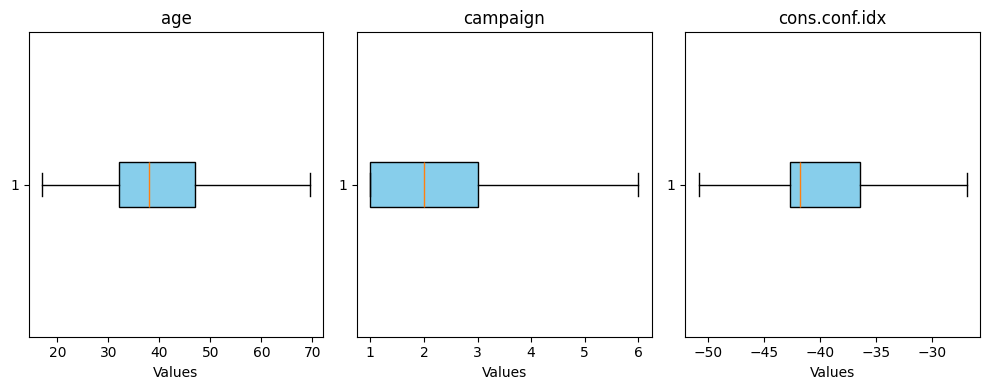

In [79]:
# Load the dataset
data = pd.read_csv('outlier-handle.csv')

# Columns for which to visualize box plots
columns_to_visualize = ['age', 'campaign', 'cons.conf.idx',]

# Create box plots
plt.figure(figsize=(10, 4))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(1, len(columns_to_visualize), i)
    plt.boxplot(data[column], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(column)
    plt.xlabel('Values')

plt.tight_layout()
plt.show()


###Data Encoding

In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from google.colab import files

In [80]:
# Load the dataset
data = pd.read_csv('outlier-handle.csv')

# Identify categorical columns for one-hot encoding and label encoding
one_hot_columns = ['marital', 'education', 'housing', 'loan','poutcome','job', 'month', 'day_of_week']  # Categorical with few unique values
label_encoding_columns = ['y']

# Apply one-hot encoding
data = pd.get_dummies(data, columns=one_hot_columns, drop_first=True)

# Apply label encoding
label_encoders = {}
for column in label_encoding_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Convert True/False columns to 1/0
boolean_columns = data.select_dtypes(include=['bool']).columns
for column in boolean_columns:
    data[column] = data[column].astype(int)

# Save the encoded dataset to a new CSV file
encoded_file_path = 'bank-encoded.csv'
data.to_csv(encoded_file_path, index=False)

# Display the first few rows of the encoded dataset
print(data.head())


    age  campaign  pdays  previous  cons.conf.idx  euribor3m  nr.employed  y  \
0  56.0         1    999         0          -36.4      4.857       5191.0  0   
1  57.0         1    999         0          -36.4      4.857       5191.0  0   
2  37.0         1    999         0          -36.4      4.857       5191.0  0   
3  40.0         1    999         0          -36.4      4.857       5191.0  0   
4  56.0         1    999         0          -36.4      4.857       5191.0  0   

   marital_married  marital_single  ...  month_jun  month_mar  month_may  \
0                1               0  ...          0          0          1   
1                1               0  ...          0          0          1   
2                1               0  ...          0          0          1   
3                1               0  ...          0          0          1   
4                1               0  ...          0          0          1   

   month_nov  month_oct  month_sep  day_of_week_mon  day_of_we

In [81]:
# Download the updated file
files.download('bank-encoded.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Pdays

In [82]:
# Replace 999 with 0 and other values with 1 in the 'pdays' column
data['pdays'] = data['pdays'].apply(lambda x: 0 if x == 999 else 1)

# Reorder columns to display 'y' at the last
columns = [col for col in data.columns if col != 'y'] + ['y']
data = data[columns]

# Save the updated dataset to a new CSV file
encoded_file_path = 'bank-encoded-updated.csv'
data.to_csv(encoded_file_path, index=False)

# Display the first few rows of the updated dataset
print(data.head())


    age  campaign  pdays  previous  cons.conf.idx  euribor3m  nr.employed  \
0  56.0         1      0         0          -36.4      4.857       5191.0   
1  57.0         1      0         0          -36.4      4.857       5191.0   
2  37.0         1      0         0          -36.4      4.857       5191.0   
3  40.0         1      0         0          -36.4      4.857       5191.0   
4  56.0         1      0         0          -36.4      4.857       5191.0   

   marital_married  marital_single  marital_unknown  ...  month_mar  \
0                1               0                0  ...          0   
1                1               0                0  ...          0   
2                1               0                0  ...          0   
3                1               0                0  ...          0   
4                1               0                0  ...          0   

   month_may  month_nov  month_oct  month_sep  day_of_week_mon  \
0          1          0          0          

In [83]:
# Download the updated file
files.download('bank-encoded-updated.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Class Imbalance

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

y
0    36537
1     4639
Name: count, dtype: int64


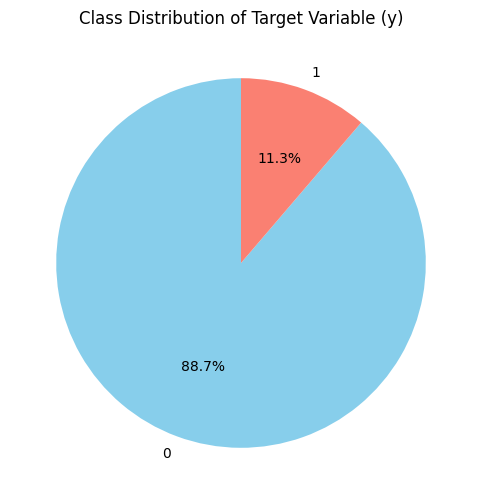

In [85]:
# Load the scaled dataset
data = pd.read_csv('bank-encoded-updated.csv')

# Check the distribution of the target variable 'y'
target_counts = data['y'].value_counts()

# Display the counts for each class
print(target_counts)

# Visualize the class distribution using a pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Class Distribution of Target Variable (y)')
plt.show()

###Re-Check Duplicates

In [86]:
# Check for duplicate rows
data = pd.read_csv('bank-encoded-updated.csv')
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Drop duplicate rows
data = data.drop_duplicates()

# Save the dataset after removing duplicates to another CSV file
duplicates_handled_file_path = 're-duplicates-handled.csv'
data.to_csv(duplicates_handled_file_path, index=False)

# Display the first few rows of the dataset after handling duplicates
print(data.head())

Number of duplicate rows: 2296
    age  campaign  pdays  previous  cons.conf.idx  euribor3m  nr.employed  \
0  56.0         1      0         0          -36.4      4.857       5191.0   
1  57.0         1      0         0          -36.4      4.857       5191.0   
2  37.0         1      0         0          -36.4      4.857       5191.0   
3  40.0         1      0         0          -36.4      4.857       5191.0   
4  56.0         1      0         0          -36.4      4.857       5191.0   

   marital_married  marital_single  marital_unknown  ...  month_mar  \
0                1               0                0  ...          0   
1                1               0                0  ...          0   
2                1               0                0  ...          0   
3                1               0                0  ...          0   
4                1               0                0  ...          0   

   month_may  month_nov  month_oct  month_sep  day_of_week_mon  \
0          1 

In [87]:
# Download the updated file
files.download('re-duplicates-handled.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

y
0    34297
1     4583
Name: count, dtype: int64


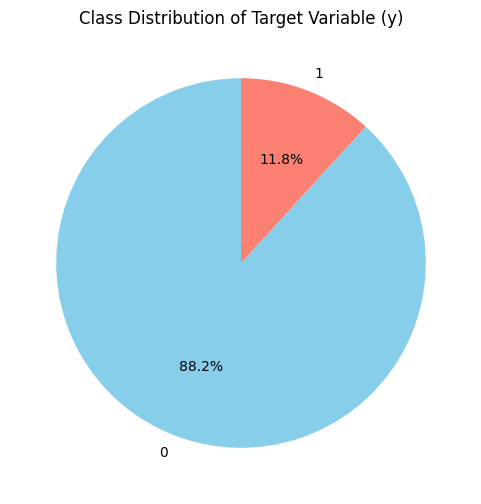

In [88]:
# Load the scaled dataset
data = pd.read_csv('re-duplicates-handled.csv')

# Check the distribution of the target variable 'y'
target_counts = data['y'].value_counts()

# Display the counts for each class
print(target_counts)

# Visualize the class distribution using a pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Class Distribution of Target Variable (y)')
plt.show()

###Feature Scaling

In [89]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [90]:
# Load the dataset
data = pd.read_csv('re-duplicates-handled.csv')

# Identify numerical columns for scaling
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Apply StandardScaler to scale numerical features
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Save the scaled dataset to a new CSV file
scaled_file_path = 'bank-scaled.csv'
data.to_csv(scaled_file_path, index=False)

# Display the first few rows of the scaled dataset
print(data.head())


        age  campaign    pdays  previous  cons.conf.idx  euribor3m  \
0  1.566652 -0.841803 -0.20046 -0.357161       0.881452   0.723824   
1  1.664859 -0.841803 -0.20046 -0.357161       0.881452   0.723824   
2 -0.299284 -0.841803 -0.20046 -0.357161       0.881452   0.723824   
3 -0.004663 -0.841803 -0.20046 -0.357161       0.881452   0.723824   
4  1.566652 -0.841803 -0.20046 -0.357161       0.881452   0.723824   

   nr.employed  marital_married  marital_single  marital_unknown  ...  \
0     0.347552         0.808296       -0.622321        -0.044835  ...   
1     0.347552         0.808296       -0.622321        -0.044835  ...   
2     0.347552         0.808296       -0.622321        -0.044835  ...   
3     0.347552         0.808296       -0.622321        -0.044835  ...   
4     0.347552         0.808296       -0.622321        -0.044835  ...   

   month_mar  month_may  month_nov  month_oct  month_sep  day_of_week_mon  \
0  -0.116769   1.397841   -0.33195  -0.135895  -0.120887       

In [91]:
# Download the updated file
files.download('bank-scaled.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>